# Loading relevant libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
diabetes = pd.read_csv("C:\\Users\\rkkadambari\\old files\\diabetes.csv")

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Preprocessing the data


In [5]:
target= diabetes.Outcome

In [6]:
diabetes= diabetes.drop('Outcome',axis=1)

In [7]:
diabetes_copy = diabetes.copy()


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(diabetes_copy)
diabetes_scaled=scaler.transform(diabetes_copy)


In [9]:
diabetes_scaled=pd.DataFrame(diabetes_scaled) 
diabetes_scaled.columns= diabetes.columns.values

In [10]:
diabetes_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


# Feature Selection

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(diabetes_scaled,target)

D:\Satya\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

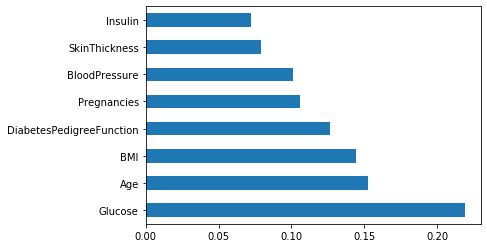

In [12]:
feat_imp= pd.Series(model.feature_importances_,index=diabetes_scaled.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [13]:
diabetes_scaled= diabetes_scaled.drop(['Insulin','SkinThickness'],axis=1)

# Training the model

In [14]:
# Test Train Split 
X_train,X_test,y_train,y_test= train_test_split(diabetes_scaled,target,test_size= 0.3,random_state=109)


In [15]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)

D:\Satya\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
lg.score(X_test,y_test)

0.7445887445887446

In [17]:
y_pred= lg.predict(X_test)


# Performance Metrics

In [18]:

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7445887445887446
Precision: 0.6825396825396826
Recall: 0.524390243902439


# Analysis Using Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
ypred= dec.predict(X_test)

# Performance Metrics

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.6926406926406926
Precision: 0.5753424657534246
Recall: 0.5121951219512195
